# Loading necessary modules

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Task 1

# Defining a data frame with dataset's column names

In [ ]:
df = pd.DataFrame(columns=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
                           'Single Epithelial Cell Size','Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])

# Read file line by line and replace '?' (missing value sign) with np.NaN

In [ ]:
i = 0
with open("breast-cancer-wisconsin.data", "r") as f:
  line = f.readline()
  while line:
    df.loc[i] = [int(i) if i != '?' else np.NaN for i in line.split(',')]
    i += 1
    line = f.readline()    

# Dropping 'Sample code number' column.

In [ ]:
df = df.drop(columns=['Sample code number'])
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Printing number of NaN values per feature.

In [ ]:
df.isna().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

# Replacing the 16 NaN values of 'Bare Nuclei' feature with the mode of the feature.

In [ ]:
df['Bare Nuclei'].fillna(df['Bare Nuclei'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

# Turning each feature to numeric format.

In [ ]:
for c in df.columns:
  df[c] = pd.to_numeric(df[c])

In [ ]:
df.dtypes

Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

# A)

# Splitting dataset to traing an test sets (50-50).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Class'], df.loc[:, df.columns == 'Class'], test_size=0.50, random_state=42)

In [ ]:
x_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
443,1,1,1,1,2,2.0,1,1,1
222,4,1,1,3,1,5.0,2,1,1
280,3,1,1,1,2,1.0,3,1,1
17,4,1,1,1,2,1.0,3,1,1
405,1,1,1,1,2,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...
71,6,10,2,8,10,2.0,7,8,10
106,10,10,10,8,2,10.0,4,1,1
270,8,4,7,1,3,10.0,3,9,2
435,10,8,10,1,3,10.0,5,1,1


In [ ]:
y_train

,Class
443,2
222,4
280,2
17,2
405,2
...,...
71,4
106,4
270,4
435,4


# B)

# train_errors and test_errors are lists that hold the correspoding errors for each value of C.

In [ ]:
train_errors = []
test_errors = []

# Generating 10 numbers from e^(-10) up to e (exclusive) for C variable.
# Fitting and predicting for each C.

In [ ]:
C = np.logspace(-10, 1, 10)
for c in C:
  linear_svm = SVC(kernel='linear', C=c)
  train_errors.append(1 - linear_svm.fit(x_train, y_train).score(x_train, y_train))
  y_pred = linear_svm.predict(x_test)
  test_errors.append(1 - accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

# Scatter plot between C and train errors

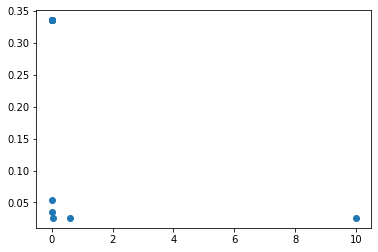

In [ ]:
plt.scatter(C, train_errors)

# Scatter plot between C and test errors

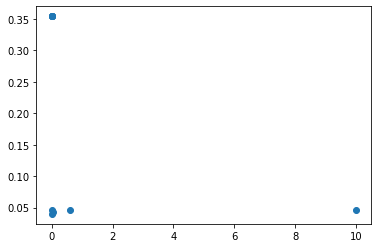

In [ ]:
plt.scatter(C, test_errors)

# C)

# Fitting and predicting with constant value for gamma=10.

In [ ]:
train_errors = []
test_errors = []

In [ ]:
for c in C:
  linear_svm = SVC(kernel='rbf', C=c, gamma=10)
  train_errors.append(1 - linear_svm.fit(x_train, y_train).score(x_train, y_train))
  y_pred = linear_svm.predict(x_test)
  test_errors.append(1 - accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

# Scatter plot between C and train errors

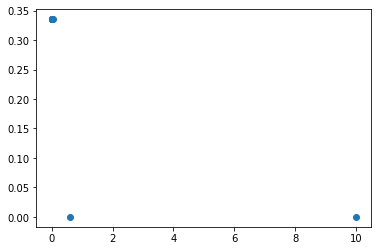

In [ ]:
plt.scatter(C, train_errors)

# Scatter plot between C and test errors

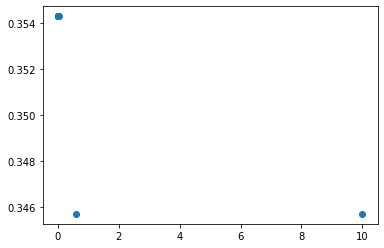

In [ ]:
plt.scatter(C, test_errors)

# D)

# Fitting and predicting with constant C and variable gamma.

In [ ]:
train_errors = []
test_errors = []

In [ ]:
g = np.logspace(-10, 1, 10)
for c in g:
  linear_svm = SVC(kernel='rbf', C=10, gamma=c)
  train_errors.append(1 - linear_svm.fit(x_train, y_train).score(x_train, y_train))
  y_pred = linear_svm.predict(x_test)
  test_errors.append(1 - accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

# Scatter plot between C and train errors

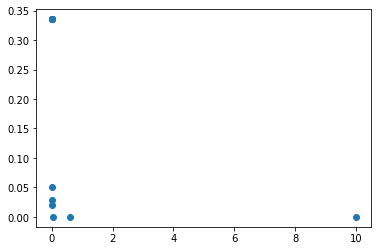

In [ ]:
plt.scatter(C, train_errors)

# Scatter plot between C and test errors

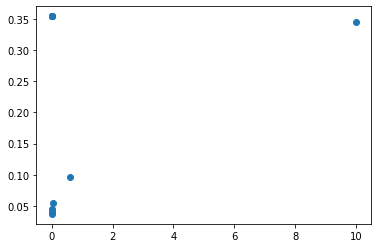

In [ ]:
plt.scatter(C, test_errors)

# Task 2

# Installing necessary git repository for MPC-KMeans

In [ ]:
!pip install git+https://github.com/datamole-ai/active-semi-supervised-clustering.git

  Cloning https://github.com/datamole-ai/active-semi-supervised-clustering.git to /tmp/pip-req-build-s8v2liz6
  Running command git clone -q https://github.com/datamole-ai/active-semi-supervised-clustering.git /tmp/pip-req-build-s8v2liz6
  Created wheel for active-semi-supervised-clustering: filename=active_semi_supervised_clustering-0.0.1-cp36-none-any.whl size=22067 sha256=a7860f40bd1f6e1704320f85198bbcae8e543fa7332aa43ce06c4117579ae5d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-iv0hus8h/wheels/d5/e4/d8/08c27190a565cd995f6727abb5e03209f563dd52ade422912c
Successfully built active-semi-supervised-clustering


In [ ]:
from sklearn import datasets, metrics
from active_semi_clustering.semi_supervised.pairwise_constraints import MPCKMeans
from active_semi_clustering.active.pairwise_constraints import ExampleOracle, ExploreConsolidate, MinMax
import pandas as pd

# Loading wine dataset

In [ ]:
X, y = datasets.load_wine(return_X_y=True)
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# Creating constraints

In [ ]:
oracle = ExampleOracle(y, max_queries_cnt=100)

active_learner = MinMax(n_clusters=3)
active_learner.fit(X, oracle=oracle)
pairwise_constraints = active_learner.pairwise_constraints_

In [ ]:
ml_length = len(pairwise_constraints[0])
cl_length = len(pairwise_constraints[1])

In [ ]:
import time

# Calculating RAND INDEX and execution time

In [ ]:
x_graph = []
y_graph = []
t_graph = []
for i in range(1, 51):
  percent_factor = 0.02 * i
  ml_percent = int(ml_length * percent_factor)
  cl_percent = int(cl_length * percent_factor)
  clusterer = MPCKMeans(n_clusters=3)
  start_time = time.time()
  clusterer.fit(X, ml=pairwise_constraints[0][:ml_percent], cl=pairwise_constraints[1][:cl_percent])  
  t_graph.append(time.time() - start_time)
  x_graph.append(percent_factor)
  y_graph.append(metrics.adjusted_rand_score(y, clusterer.labels_))

AttributeError: ignored

# Plotting RAND INDEX against % of constraints

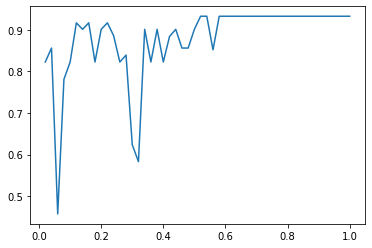

In [ ]:
plt.plot(x_graph, y_graph)

# Plotting Execution Time against % of constraints

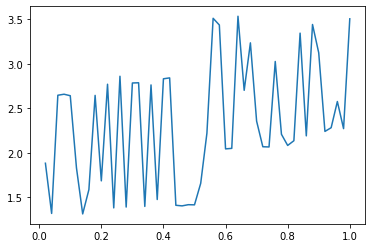

In [ ]:
plt.plot(x_graph, t_graph)